In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# load dataset
customers = pd.read_csv("./data/customers_with_orders.csv")

In [3]:
# impute time_between_purchases and time_to_first_purchase with 999
customers['time_between_purchases'] = customers['time_between_purchases'].fillna(999)
customers['time_to_first_purchase'] = customers['time_to_first_purchase'].fillna(999)
# impute average_order_value with 999
customers['average_order_value'] = customers['average_order_value'].fillna(0)

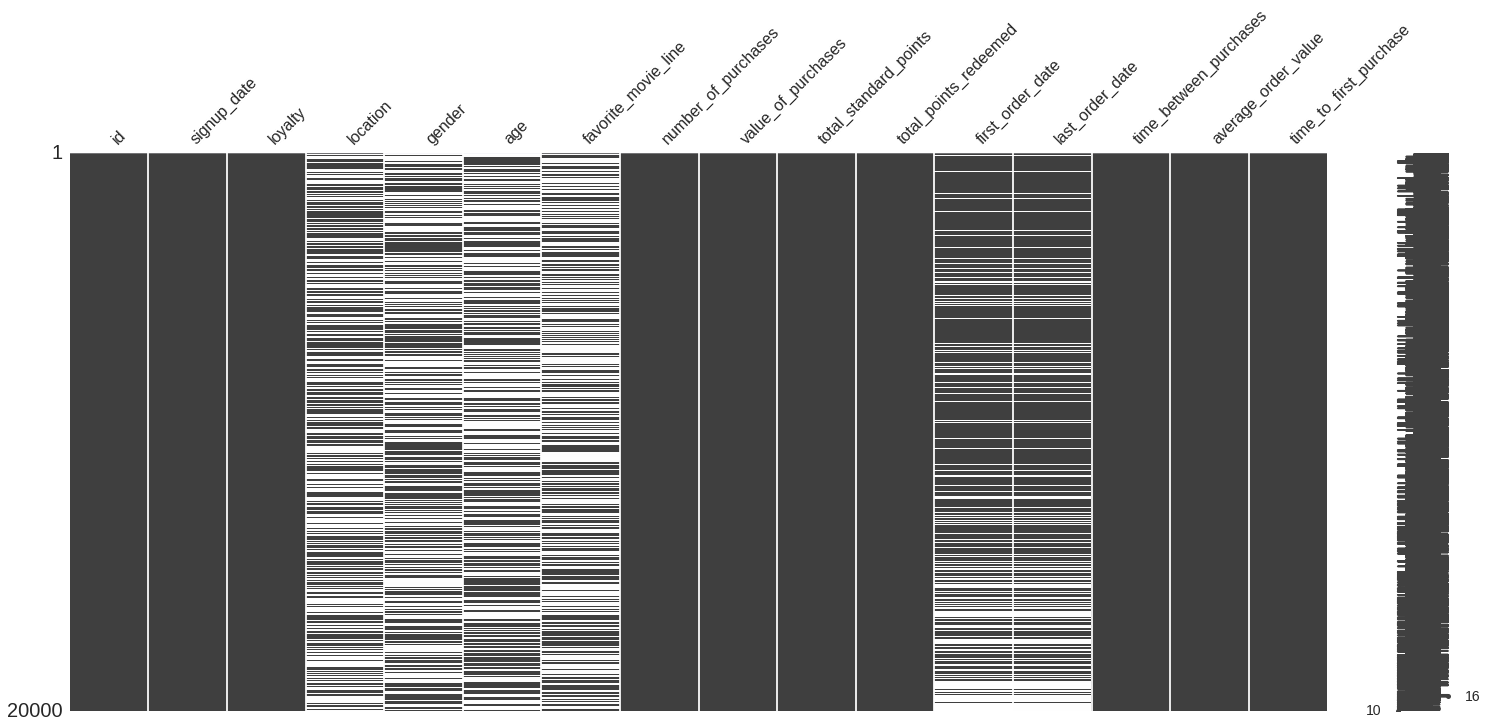

In [4]:
# check missing
msno.matrix(customers)

In [5]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [6]:
def random_search_cv(X, y, clf, param_dist):
    n_iter_search = 200
    random_search = RandomizedSearchCV(clf, 
                                       param_distributions=param_dist,
                                       n_iter=n_iter_search)

    start = time()
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(random_search.cv_results_, n_top=1)
    return random_search

## use ExtraTreesClassifier

In [18]:
clf = ExtraTreesClassifier(n_estimators=20)
# clf = GradientBoostingClassifier()
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 8),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


## Predict location column

In [8]:
# train test splitting 
customers_loc = customers[customers.location.notnull()]
X = customers_loc[[u'loyalty',u'number_of_purchases', 
                   u'value_of_purchases',u'total_standard_points', 
                   u'total_points_redeemed', u'time_between_purchases', 
                   u'average_order_value', u'time_to_first_purchase']]
y = customers_loc.location
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# string encoding
features = [u'loyalty']
le = LabelEncoder()
for feature in features:
    le.fit(X_train[[feature]])
    X_train[feature] = le.transform(X_train[[feature]]) 
    X_test[feature] = le.transform(X_test[[feature]])

In [10]:
rs = random_search_cv(X_train, y_train, clf=clf, param_dist=param_dist)
print classification_report(y_test, rs.predict(X_test))

RandomizedSearchCV took 70.76 seconds for 200 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.471 (std: 0.005)
Parameters: {'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 4, 'criterion': 'entropy', 'max_features': 5, 'max_depth': None}

             precision    recall  f1-score   support

         LA       0.52      0.41      0.46       997
         NY       0.43      0.39      0.41       995
         SF       0.45      0.59      0.51      1002

avg / total       0.47      0.46      0.46      2994



## Predict Gender column

In [11]:
# train test splitting 
customers_gdr = customers[customers.gender.notnull()]
X = customers_gdr[[u'loyalty',u'number_of_purchases', 
                   u'value_of_purchases',u'total_standard_points', 
                   u'total_points_redeemed', u'time_between_purchases', 
                   u'average_order_value', u'time_to_first_purchase']]
y = customers_gdr.gender
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# string encoding
features = [u'loyalty']
le = LabelEncoder()
for feature in features:
    le.fit(X_train[[feature]])
    X_train[feature] = le.transform(X_train[[feature]]) 
    X_test[feature] = le.transform(X_test[[feature]])

In [13]:
rs = random_search_cv(X_train, y_train, clf=clf, param_dist=param_dist)
print classification_report(y_test, rs.predict(X_test))

RandomizedSearchCV took 73.79 seconds for 200 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.359 (std: 0.003)
Parameters: {'bootstrap': True, 'min_samples_leaf': 9, 'min_samples_split': 6, 'criterion': 'gini', 'max_features': 7, 'max_depth': None}

             precision    recall  f1-score   support

          A       0.34      0.65      0.45       734
          B       0.27      0.14      0.19       767
          C       0.34      0.25      0.29       724
          D       0.44      0.37      0.40       783

avg / total       0.35      0.35      0.33      3008



## Predict age column

In [14]:
# train test splitting 
customers_age = customers[customers.age.notnull()]
X = customers_age[[u'loyalty',u'number_of_purchases', 
                   u'value_of_purchases',u'total_standard_points', 
                   u'total_points_redeemed', u'time_between_purchases', 
                   u'average_order_value', u'time_to_first_purchase']]
y = customers_age.age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# string encoding
features = [u'loyalty']
le = LabelEncoder()
for feature in features:
    le.fit(X_train[[feature]])
    X_train[feature] = le.transform(X_train[[feature]]) 
    X_test[feature] = le.transform(X_test[[feature]])

In [16]:
rs = random_search_cv(X_train, y_train, clf=clf, param_dist=param_dist)
print classification_report(y_test, rs.predict(X_test))

RandomizedSearchCV took 73.23 seconds for 200 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.484 (std: 0.007)
Parameters: {'bootstrap': False, 'min_samples_leaf': 7, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 7, 'max_depth': None}

             precision    recall  f1-score   support

     oldish       0.34      0.27      0.30       760
       wise       0.45      0.60      0.52       776
      young       0.47      0.44      0.45       738
   youthful       0.55      0.53      0.54       787

avg / total       0.46      0.46      0.45      3061



## Summary
None of the three models are accurate enough for imputing the missingness, I therefore decide not to use the predicted values for imputation.